<a href="https://colab.research.google.com/github/hafsaAit/Computer-vision/blob/main/Tp_1_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##1.Charger et afficher une image


In [3]:
# Charger une image
image = cv2.imread('/lena.tif')  # Remplace par le chemin de ton image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR en RGB pour Matplotlib

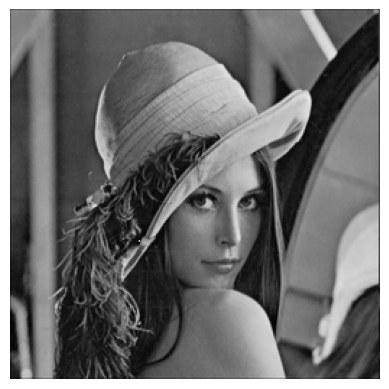

In [4]:
# Afficher l'image
plt.imshow(image)
plt.axis('off')
plt.show()

##2.Implémenter les transformations "from scratch"

###a. Addition et soustraction d’images

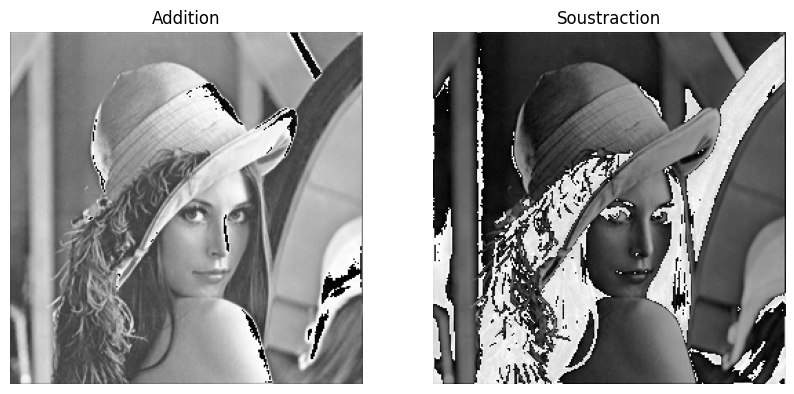

In [5]:
def add_scalar(image, scalar):
    return np.clip(image + scalar, 0, 255).astype(np.uint8)

def subtract_scalar(image, scalar):
    return np.clip(image - scalar, 0, 255).astype(np.uint8)

#
image_added = add_scalar(image, 50)
image_subtracted = subtract_scalar(image, 50)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_added)
plt.title("Addition")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_subtracted)
plt.title("Soustraction")
plt.axis('off')
plt.show()


###b. Multiplication par un scalaire

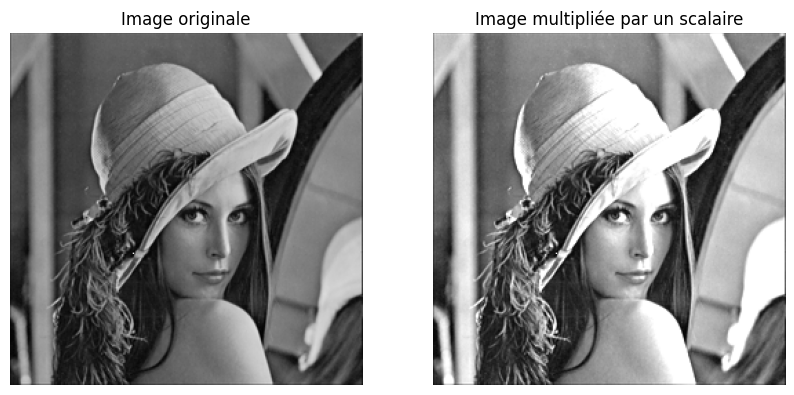

In [6]:
def multiply_scalar(image, scalar):
    # Multiplier chaque pixel par le scalaire et limiter les valeurs entre 0 et 255
    return np.clip(image * scalar, 0, 255).astype(np.uint8)


image_multiplied = multiply_scalar(image, 1.5)  # Multiplier par 1.5

# Afficher l'image originale et l'image multipliée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image originale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_multiplied)
plt.title("Image multipliée par un scalaire")
plt.axis('off')

plt.show()


### c. Translation (déplacement de l'image)

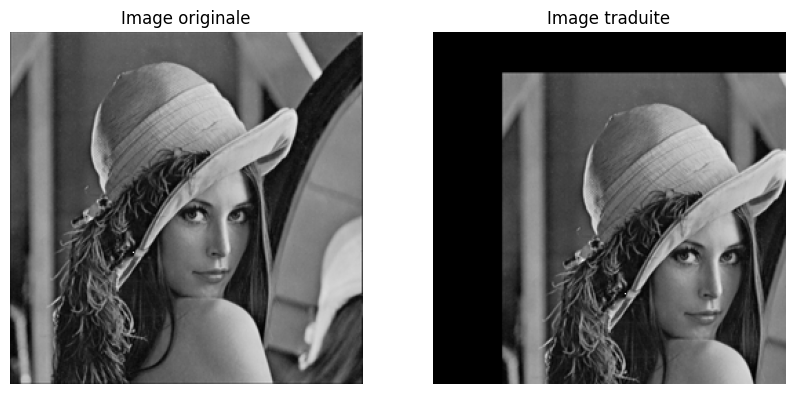

In [7]:
def translate_image(image, tx, ty):
    """
    Déplace l'image selon un décalage (tx, ty).
    :param image: Image à traduire
    :param tx: Décalage horizontal
    :param ty: Décalage vertical
    :return: Image traduite
    """
    (h, w) = image.shape[:2]

    # Créer une matrice de translation
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Appliquer la transformation
    translated = cv2.warpAffine(image, translation_matrix, (w, h))

    return translated

#
image_translated = translate_image(image, tx=50, ty=30)  # Décalage de 50px à droite et 30px vers le bas

# Afficher l'image originale et l'image traduite
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image originale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_translated)
plt.title("Image traduite")
plt.axis('off')

plt.show()


###d. Rotation de l’image

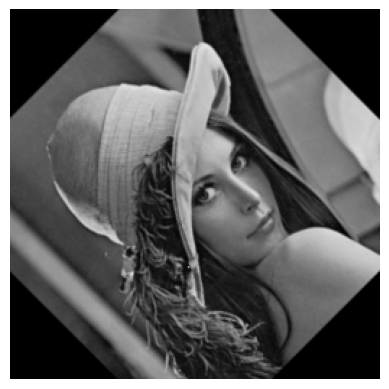

In [8]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Calculer la matrice de rotation
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))

    return rotated

#
rotated_image = rotate_image(image, 45)

# Afficher le résultat
plt.imshow(rotated_image)
plt.axis('off')
plt.show()


##3.Implémenter les fonctions **texte en gras**(from scratch)

### a. Calcul de l'histogramme

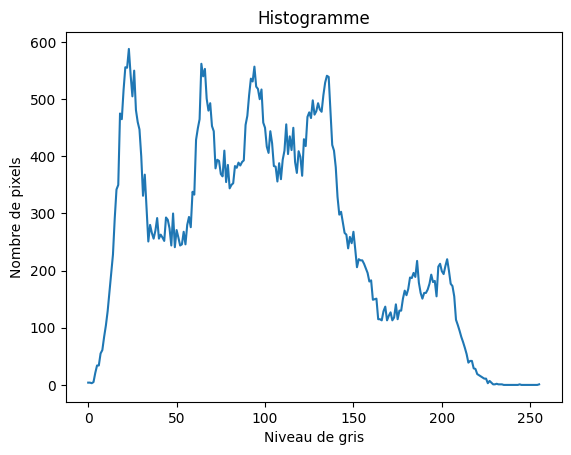

In [9]:
def calculate_histogram(image):
    """
    Calcule l'histogramme d'une image en niveaux de gris.
    """
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Calculer l'histogramme
histogram = calculate_histogram(gray_image)

# Afficher l'histogramme
plt.plot(histogram)
plt.title("Histogramme")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")
plt.show()


###b. Histogramme cumulé

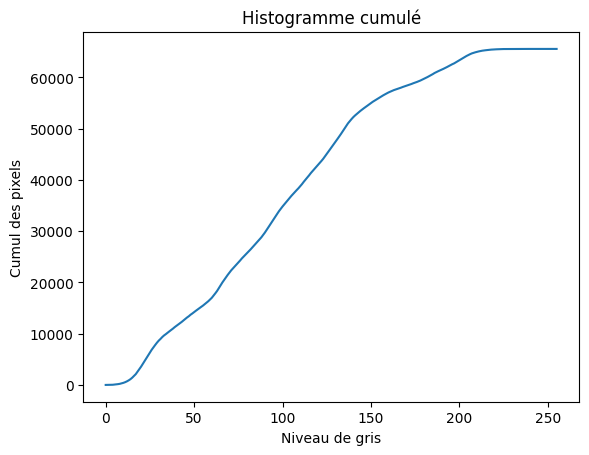

In [10]:
def cumulative_histogram(histogram):
    """
    Calcule l'histogramme cumulé à partir d'un histogramme.
    """
    return np.cumsum(histogram)

# Calculer l'histogramme cumulé
cumulative_hist = cumulative_histogram(histogram)

# Afficher l'histogramme cumulé
plt.plot(cumulative_hist)
plt.title("Histogramme cumulé")
plt.xlabel("Niveau de gris")
plt.ylabel("Cumul des pixels")
plt.show()


###c. Recadrage de la dynamique (normalisation des niveaux de gris)

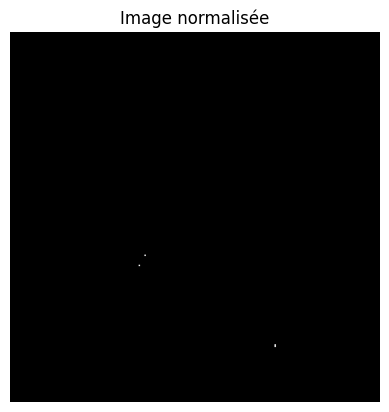

In [11]:
def normalize_gray_levels(image):
    """
    Normalise les niveaux de gris d'une image.
    """
    min_val = np.min(image)
    max_val = np.max(image)
    normalized = 255 * (image - min_val) / (max_val - min_val)
    return normalized.astype(np.uint8)

# Normaliser l'image
normalized_image = normalize_gray_levels(gray_image)

# Afficher l'image normalisée
plt.imshow(normalized_image, cmap='gray')
plt.title("Image normalisée")
plt.axis('off')
plt.show()


###d. Seuillage (binarisation de l'image)

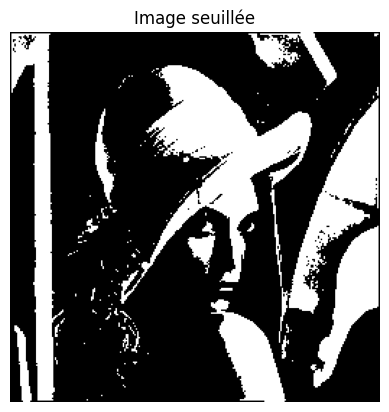

In [12]:
def threshold_image(image, threshold):
    """
    Binarise une image en fonction d'un seuil donné.
    """
    binary_image = np.where(image > threshold, 255, 0)
    return binary_image.astype(np.uint8)

# Appliquer un seuillage
thresholded_image = threshold_image(gray_image, 128)

# Afficher l'image seuillée
plt.imshow(thresholded_image, cmap='gray')
plt.title("Image seuillée")
plt.axis('off')
plt.show()


### e. Inversion des couleurs de l'image

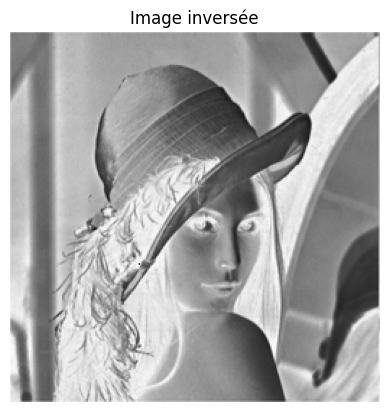

In [13]:
def invert_colors(image):
    """
    Inverse les couleurs d'une image.
    """
    return 255 - image

# Inverser les couleurs
inverted_image = invert_colors(gray_image)

# Afficher l'image inversée
plt.imshow(inverted_image, cmap='gray')
plt.title("Image inversée")
plt.axis('off')
plt.show()


### f.Égalisation de l'histogramme

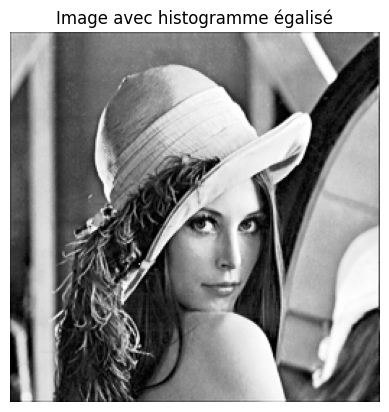

In [17]:
def equalize_histogram(image):
    """
    Égalise l'histogramme d'une image en niveaux de gris.
    """
    histogram = calculate_histogram(image)
    cumulative_hist = cumulative_histogram(histogram)
    total_pixels = image.size
    equalized_image = (255 * cumulative_hist[image] / total_pixels).astype(np.uint8)
    return equalized_image

# Appliquer l'égalisation de l'histogramme
equalized_image = equalize_histogram(gray_image)

# Afficher l'image égalisée
plt.imshow(equalized_image, cmap='gray')
plt.title("Image avec histogramme égalisé")
plt.axis('off')
plt.show()


### g. Transformation exponentielle

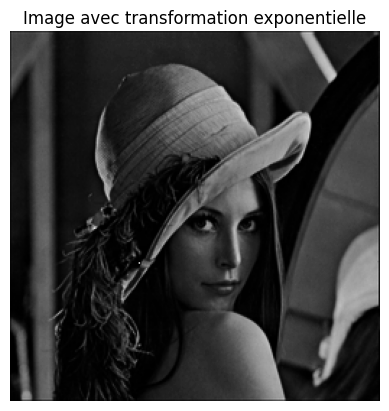

In [18]:
def exponential_transform(image, gamma):
    """
    Applique une transformation exponentielle sur une image.
    """
    normalized = image / 255.0  # Normaliser entre [0, 1]
    transformed = np.power(normalized, gamma)
    return (transformed * 255).astype(np.uint8)

# Appliquer une transformation exponentielle
exponential_image = exponential_transform(gray_image, gamma=2.0)

# Afficher l'image transformée
plt.imshow(exponential_image, cmap='gray')
plt.title("Image avec transformation exponentielle")
plt.axis('off')
plt.show()


## 4.Comparaison des Résultats : Implémentation Manuelle vs Fonctions **OpenCV**

###a. Calcul de l'histogramme

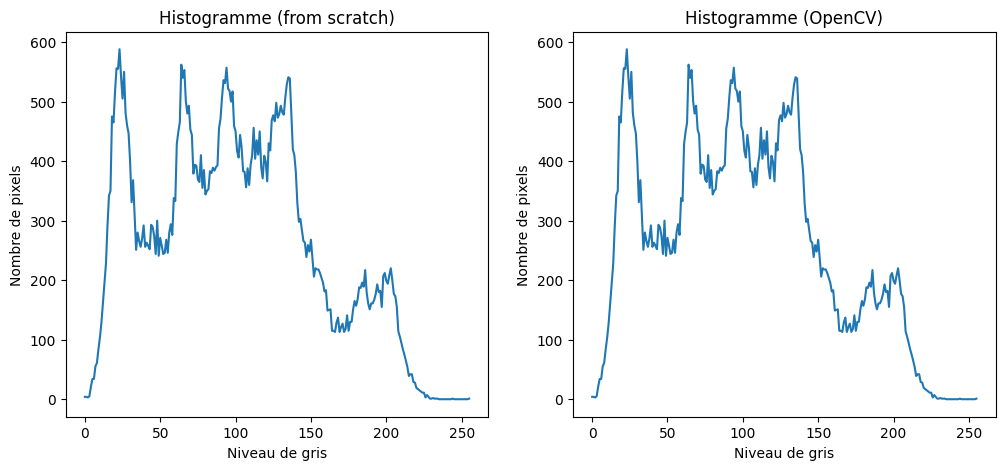

In [19]:
# Histogramme avec OpenCV
opencv_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(histogram)
plt.title("Histogramme (from scratch)")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(1, 2, 2)
plt.plot(opencv_hist)
plt.title("Histogramme (OpenCV)")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")
plt.show()


### b. Histogramme cumulé

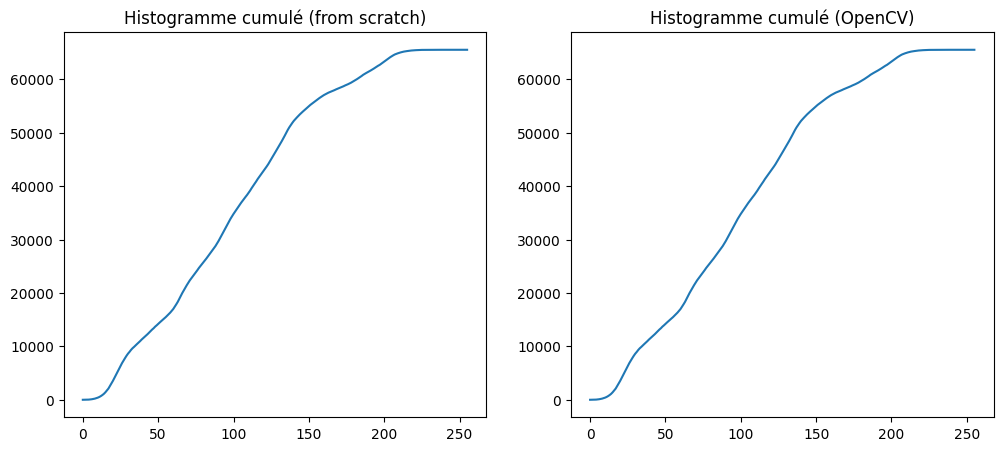

In [20]:
# Histogramme cumulé avec OpenCV
opencv_cumulative_hist = np.cumsum(opencv_hist)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cumulative_hist)
plt.title("Histogramme cumulé (from scratch)")

plt.subplot(1, 2, 2)
plt.plot(opencv_cumulative_hist)
plt.title("Histogramme cumulé (OpenCV)")
plt.show()


###c. Recadrage de la dynamique (normalisation)

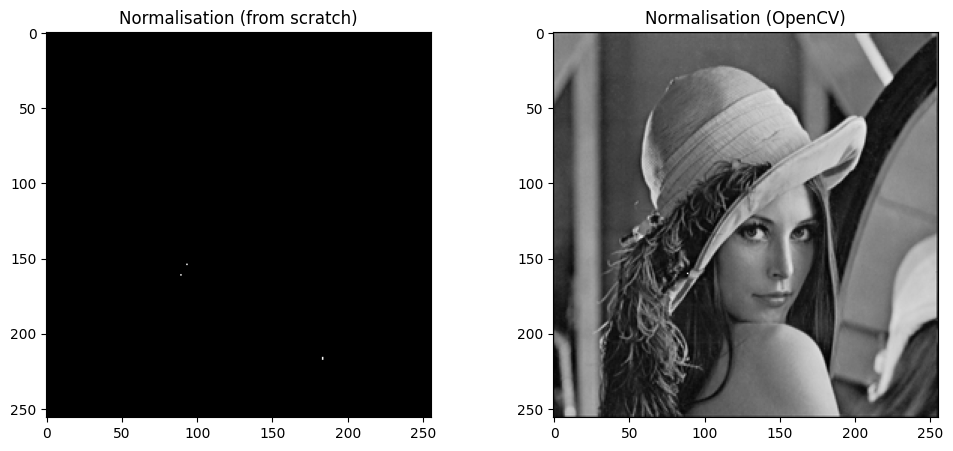

In [21]:
# Normalisation avec OpenCV
opencv_normalized = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalisation (from scratch)")

plt.subplot(1, 2, 2)
plt.imshow(opencv_normalized, cmap='gray')
plt.title("Normalisation (OpenCV)")
plt.show()


### d. Seuillage (binarisation de l'image)


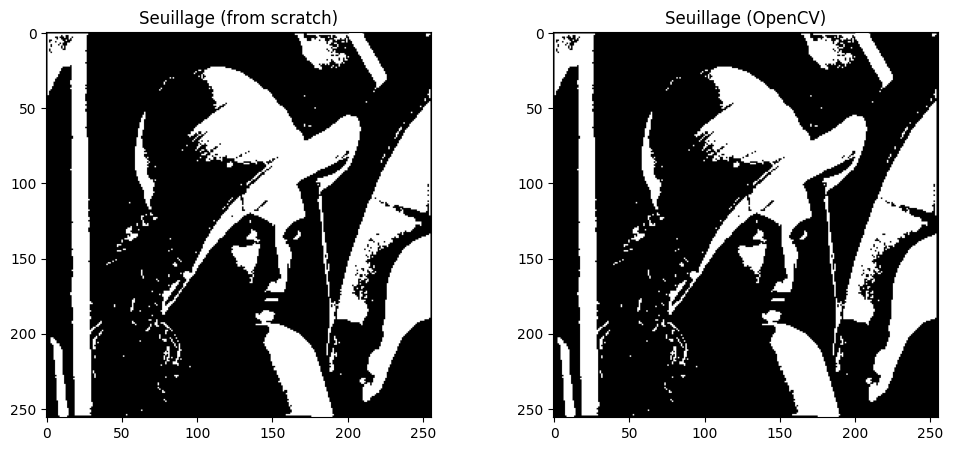

In [22]:
# Seuillage avec OpenCV
_, opencv_thresholded = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Seuillage (from scratch)")

plt.subplot(1, 2, 2)
plt.imshow(opencv_thresholded, cmap='gray')
plt.title("Seuillage (OpenCV)")
plt.show()


### e. Inversion des couleurs

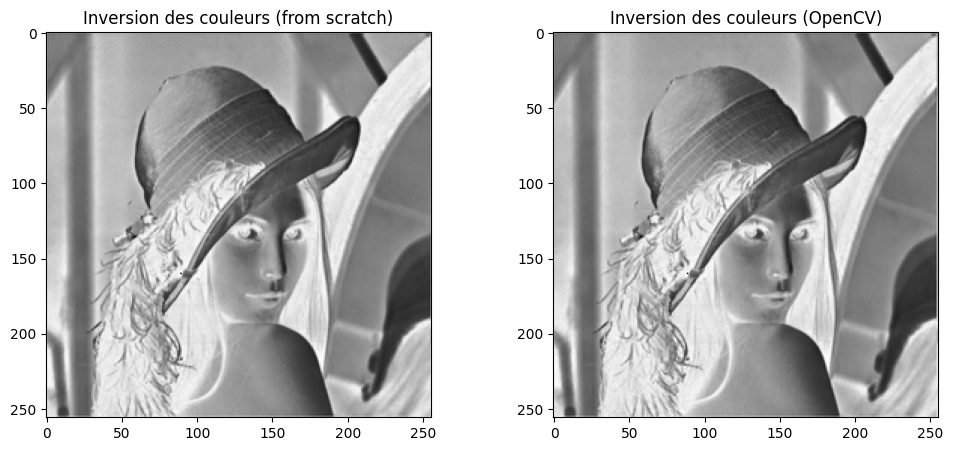

In [23]:
# Inversion avec OpenCV
opencv_inverted = cv2.bitwise_not(gray_image)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(inverted_image, cmap='gray')
plt.title("Inversion des couleurs (from scratch)")

plt.subplot(1, 2, 2)
plt.imshow(opencv_inverted, cmap='gray')
plt.title("Inversion des couleurs (OpenCV)")
plt.show()


### f. Égalisation de l'histogramme

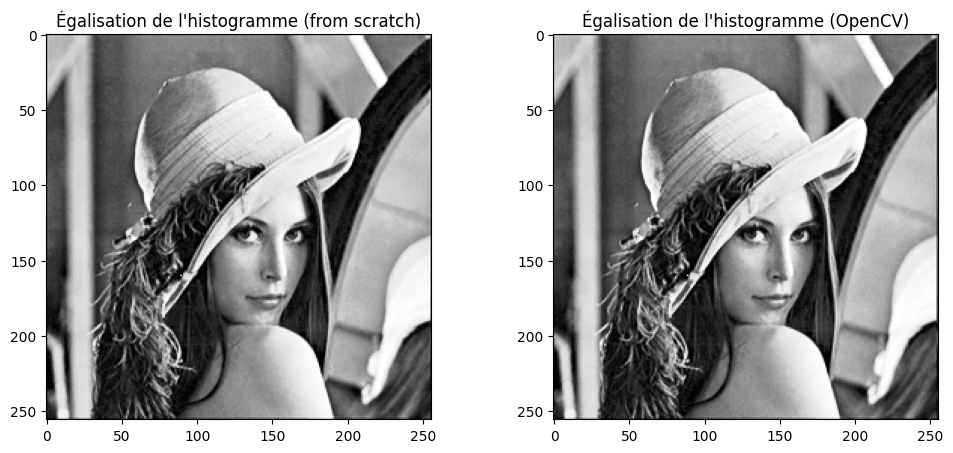

In [24]:
# Égalisation avec OpenCV
opencv_equalized = cv2.equalizeHist(gray_image)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title("Égalisation de l'histogramme (from scratch)")

plt.subplot(1, 2, 2)
plt.imshow(opencv_equalized, cmap='gray')
plt.title("Égalisation de l'histogramme (OpenCV)")
plt.show()


### g. Transformation exponentielle

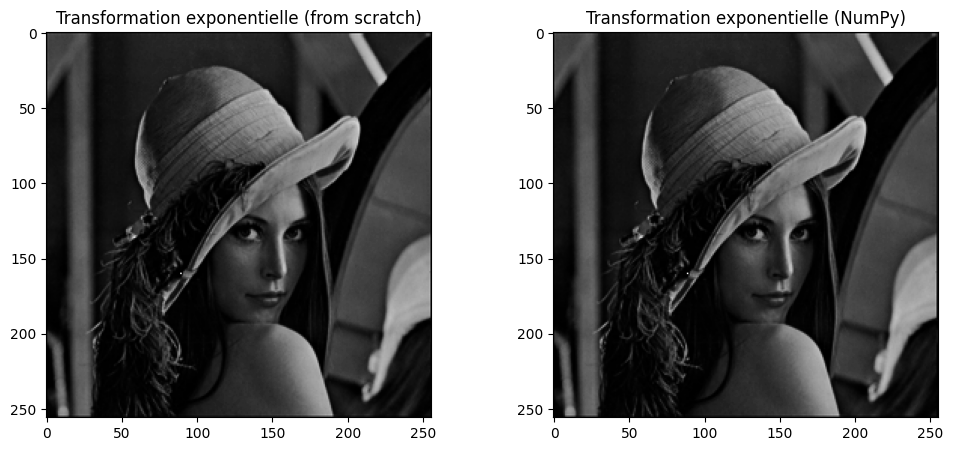

In [25]:
# Transformation exponentielle (re-implémentée avec NumPy pour comparaison)
opencv_exponential = np.power(gray_image / 255.0, 2.0)
opencv_exponential = (opencv_exponential * 255).astype(np.uint8)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(exponential_image, cmap='gray')
plt.title("Transformation exponentielle (from scratch)")

plt.subplot(1, 2, 2)
plt.imshow(opencv_exponential, cmap='gray')
plt.title("Transformation exponentielle (NumPy)")
plt.show()
